In [1]:
from scipy.optimize import curve_fit
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

T=30000 
l=1000 
dt=0.01
def f(l):
    return l[0]
#排序用的function 比較狀態list的第一個數 表示用位置來排序

def normal(avg,var,c): #從Gaussian亂數抽樣 (抽出來一定大於零) 
   
    a=np.ndarray.tolist(np.random.normal(avg,var,3000)) #a是一個有normal分布的list
    
    a=list(filter(lambda x:x>c,a)) #濾掉小於等於c的
    
    s=random.sample(a,1) #從a裡面抽一個出來 會是大小事1的list
    return s[0] #取出亂數


def ini(V_max,avg_d,avg_t,rho): #初始化道路的程式 
    S=[] #儲存初始state  [0]位置  [1]速度 [2]安全距離 [3]延遲時間
    
    n=int(rho*l) #車子數量由密度 道路長 所決定 初始的位置
    
    rad_x=random.sample(range(l),n) #不重複的n個數的list
    
    
    for i in range(n):
        S.append([rad_x[i],random.uniform(0,V_max),normal(avg_d,0.3*avg_d,0),normal(avg_t,0.1*avg_t,0)])
       

    S.sort(key=f)
    for i in  range(len(S)):
        if i>0 and S[i][0]<S[i-1][0]:
            print("位置出錯ㄌ")
    
    return S
    
    

def avg(x): #用來算list平均用的
    c=0
    for i in x:
        
        c+=i
            
    return c/len(x)


def rule(V_max,dx,car): #速度上限   與前車距離    Car 車子的狀態vector
    V_op=(V_max/2)*(np.tanh(dx-car[2])+np.tanh(car[2])) #由駕駛的delay time 安全距離 與前車距離 決定適當的速度
    car[1]+=(1/car[3])*(V_op-car[1])*dt
    if car[1]<0:
        car[1]=0
    
print("done")


               

done


In [2]:
avgV=[] #個個時刻的平均速度

V_hist=[]

def traffic(V_max,avg_d,avg_t,rho):
    #n是車子數量 V_max速度上限 d 安全距離
    S=ini(V_max,avg_d,avg_t,rho)
    V=[] #計算平均速度用的
    
    for j in range(T):
        
        V1=[]
        #每個時段內發生的事
       
        for i in range(len(S)):
            x=len(S)-1
           
           
            
        #每台車的狀況
            if i>0 :
                dx=S[x-i+1][0]-S[x-i][0] #前後車距
                rule(V_max,dx,S[x-i])
                    
                
                if S[x-i][1]<0 or dx<=0: #debug用的
                            
                    print(S[x-i][0],S[x-i][1],j,i)
                    break
                
            if i==0 : #最前面那台車的情形 要算和第一台車的距離
                
                dx=S[0][0]-(S[x-i][0]-l)
                rule(V_max,dx,S[x-i])
                 
            
        
        for k in range(len(S)):
            S[k][0]+=S[k][1]*dt  #更新車子的位置
         
            
            V1.append(S[k][1])  #j時刻所有車的速度都丟進來
            
            
            if S[k][0]>l: 
                S[k][0]-=l
        S.sort(key=f) #等大家更新好位置後更新順序
        a=100
        if j%a==0:
            V_hist.append([])
        
            for k in range(len(S)):
                V_hist[int(j/a)].append(S[k][1]) #此刻的速度分布
            
            
        
        avgV.append(avg(V1)) #j時刻的平均速度
    






In [7]:
avgV=[] #個個時刻的平均速度

V_hist=[]
traffic(5,5,2,0.4)

In [10]:
path="fig"
 
for i in range(20000):
    s=str(i)
    ass="\dog"
    
    V_hist2=np.array(V_hist[i])
    plt.xlabel("velocity")
    plt.xlim(0,5)
    plt.ylim(0,100)
    plt.ylabel("car number")
    plt.hist(V_hist2,bins=50)
    plt.savefig(path+ass+s)
    plt.clf()

IndexError: list index out of range

(array([245.,   4.,   1.,   6.,   2.,   1.,   2.,   2.,   5.,   2.,   3.,
          3.,   1.,   2.,   1.,   4.,   2.,   2.,   2.,   0.,   0.,   4.,
          0.,   1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   1.,   1.,
          0.,   3.,   2.,   3.,   3.,   2.,   0.,   1.,   2.,   3.,   4.,
          6.,   6.,   4.,  10.,   8.,  35.]),
 array([2.22134373e-10, 9.99698724e-02, 1.99939744e-01, 2.99909617e-01,
        3.99879489e-01, 4.99849361e-01, 5.99819233e-01, 6.99789105e-01,
        7.99758977e-01, 8.99728849e-01, 9.99698722e-01, 1.09966859e+00,
        1.19963847e+00, 1.29960834e+00, 1.39957821e+00, 1.49954808e+00,
        1.59951795e+00, 1.69948783e+00, 1.79945770e+00, 1.89942757e+00,
        1.99939744e+00, 2.09936732e+00, 2.19933719e+00, 2.29930706e+00,
        2.39927693e+00, 2.49924680e+00, 2.59921668e+00, 2.69918655e+00,
        2.79915642e+00, 2.89912629e+00, 2.99909616e+00, 3.09906604e+00,
        3.19903591e+00, 3.29900578e+00, 3.39897565e+00, 3.49894552e+00,
        3.

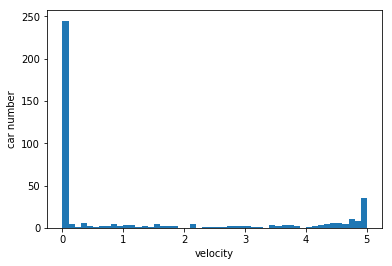

In [9]:
    V_hist2=np.array(V_hist[239])
    plt.xlabel("velocity")

    plt.ylabel("car number")
    plt.hist(V_hist2,bins=50)